In [1]:
import pandas as pd
import collections
import json
import re
import matplotlib.pyplot as plt
import seaborn as sns
# word cloud
from wordcloud import WordCloud

In [2]:
# to do, format this better and focus analysis only on these conferences, update the df in the beginning
venue_map = [('CHI Extended Abstracts', 'CHI'),
 ('CHI', 'CHI'),
 ('CSCW', 'CSCW'),
 ('UbiComp', 'UBI'),
 ('UIST', 'UIST'),
 ('Computer Supported Cooperative Work (CSCW)', 'CSCW'),
 ('UbiComp Adjunct', 'UBI'),
 ('CSCW Companion', 'CSCW'),
 ('CHI Conference Companion', 'CHI'),
 ('UbiComp/ISWC Adjunct', 'UBI'),
 ("CHI EA '04", 'CHI'),
 ('CHI 95 Conference Companion', 'CHI'),
 ('CHI Conference Summary', 'CHI'),
 ("UbiComp '11", 'UBI'),
 ('CHI 2014', 'CHI'),
 ("CHI '92", 'CHI'),
 ("CHI '99", 'CHI'),
 ("CHI '03", 'CHI'),
 ("CSCW '13", 'CSCW'),
 ("CHI '95", 'CHI'),
 ("CHI '89", 'CHI'),
 ("UbiComp '10 Adjunct", 'UBI'),
 ("CHI '90", 'CHI'),
 ("CHI '94", 'CHI'),
 ("CSCW '06", 'CSCW'),
 ("CSCW '10", 'CSCW'),
 ("CHI '83", 'CHI'),
 ("UIST'14 Adjunct", 'UIST'),
 ("CHI '87", 'CHI'),
 ("CHI '86", 'CHI'),
 ("CSCW '96", 'CSCW'),
 ("UIST '13 Adjunct", 'UIST'),
 ("CSCW '00", 'CSCW'),
 ("CSCW '98", 'CSCW'),
 ("UIST '10", 'UIST'),
 ("CHI '88", 'CHI'),
 ("CSCW '02", 'CSCW'),
 ("UIST Adjunct Proceedings '12", 'UIST'),
 ("CHI '85", 'CHI'),
 ("CSCW '94", 'CSCW'),
 ("CSCW '92", 'CSCW'),
 ("UIST '04", 'UIST'),
 ("UIST '11 Adjunct", 'UIST'),
 ("UIST '08", 'UIST'),
 ("UIST '09", 'UIST'),
 ("CHI '82", 'CHI'),
 ("UIST '97", 'UIST'),
 ("CSCW '86", 'CSCW'),
 ("UIST '95", 'UIST'),
 ("UIST '98", 'UIST'),
 ("UIST '94", 'UIST'),
 ("CSCW '88", 'CSCW'),
 ("UIST '01", 'UIST'),
 ("UIST '96", 'UIST'),
 ("UIST '00", 'UIST'),
 ("UIST '93", 'UIST'),
 ("CSCW '90", 'CSCW'),
 ("UIST '99", 'UIST'),
 ("UIST '02", 'UIST'),
 ("UIST '03", 'UIST'),
 ('CHI 2007', 'CHI'),
 ("UIST '91", 'UIST'),
 ("UIST '89", 'UIST'),
 ("UIST '90", 'UIST'),
 ('CHI 2010', 'CHI'),
 ("UIST '92", 'UIST'),
 ('CHI 2008', 'CHI'),
 ('UBICOMP 2015', 'UBI'),
 ('CHI 2011', 'CHI'),
 ('CHI 2009', 'CHI'),
 ('Ubicomp 2009', 'UBI'),
 ('UbiComp 2016', 'UBI'),
 ('UbiComp 2011', 'UBI'),
 ('CHI 1994', 'CHI'),
 ('CHI 2012', 'CHI'),
 ('CHI 2002', 'CHI'),
 ('CHI 2013', 'CHI'),
 ("CHI '81", 'CHI'),
 ('CHI 2017', 'CHI'),
 ('UbiComp 2014', 'UBI'),
 ('CHI 2015', 'CHI'),
 ('CHI 2006', 'CHI'),
 ('UbiComp 2013', 'UBI'),
 ('UbiComp 2008', 'UBI'),
 ('CHI 2003', 'CHI'),
 ('Ubicomp 2010', 'UBI'),
 ('CHI 2001', 'CHI'),
 ('CHI 2018', 'CHI'),
 ('CHI 1995', 'CHI'),
 ("CHI '02", 'CHI'),
 ('CSCW 2017', 'CSCW'),
 ('Computer Supported Cooperative Work and Social Computing', 'CSCW'),
 ('CHI 1997', 'CHI'),
 ('CHI 2016', 'CHI'),
 ('CHI 2005', 'CHI'),
 ('Proc. ACM Hum. Comput. Interact.', 'CSCW'),
 ('Comput. Support. Cooperative Work.', 'CSCW'),
 ('UBICOMP 2012', 'UBI'),
 ('CHI 1998', 'CHI'),
 ('CHI 2004', 'CHI'),
 ('CSCW 2008', 'CSCW'),
 ('CSCW 2016', 'CSCW'),
 ('UIST 2013', 'UIST'),
 ('UIST 2016', 'UIST'),
 ('UIST 2014', 'UIST'),
 ('UIST 2011', 'UIST'),
 ('CHI 1993', 'CHI'),
 ('CHI 2000', 'CHI'),
 ('CSCW 2010', 'CSCW'),
 ('CSCW 2012', 'CSCW'),
 ('CSCW 2014', 'CSCW'),
 ('CSCW 2013', 'CSCW'),
 ('CSCW 2015', 'CSCW'),
 ('Proc. ACM Interact. Mob. Wearable Ubiquitous Technol.', 'UBI'),
 ('UbiComp 2017', 'UBI'),
 ('UIST 2007', 'UIST'),
 ('UIST 2008', 'UIST'),
 ('CHI 1999', 'CHI')]

venue_map_dict = {}
for unit in venue_map:
    venue_map_dict[unit[0]] = unit[1]

In [3]:
# data that joins patent paper citation
df = pd.read_csv('final_all_HCI_info_citation_per_record.tsv',sep=',')

C:\Users\hanch\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.columns

Index(['Unnamed: 0', 'paperid_x', 'patent', 'mag_id', 'paperid_y',
       'externalIds', 'url', 'title_x', 'abstract_x', 'venue', 'year',
       'referenceCount', 'citationCount', 'influentialCitationCount',
       'isOpenAccess', 'fieldsOfStudy', 's2FieldsOfStudy', 'publicationTypes',
       'publicationDate', 'journal', 'authors', 'patent_id', 'country', 'date',
       'abstract_y', 'title_y', 'kind', 'num_claims', 'withdrawn',
       'inventor_id', 'inventor_name_first', 'inventor_name_last', 'male_flag',
       'attribution_status', 'assignee_id', 'assignee_name_first',
       'assignee_name_last', 'organization', 'aff_affiliations',
       'aff_authorids', 'aff_paperid'],
      dtype='object')

In [5]:
df.head(5).T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
paperid_x,2134161165,2134161165,2134161165,2134161165,2134161165
patent,10001804,10001804,10001804,10001804,6024576
mag_id,2134161165,2134161165,2134161165,2134161165,2134161165
paperid_y,7265fc23f282d1e64a6213a48770ba2534345985,7265fc23f282d1e64a6213a48770ba2534345985,7265fc23f282d1e64a6213a48770ba2534345985,7265fc23f282d1e64a6213a48770ba2534345985,7265fc23f282d1e64a6213a48770ba2534345985
externalIds,"{'DBLP': 'conf/chi/RamsteinH94', 'MAG': '21341...","{'DBLP': 'conf/chi/RamsteinH94', 'MAG': '21341...","{'DBLP': 'conf/chi/RamsteinH94', 'MAG': '21341...","{'DBLP': 'conf/chi/RamsteinH94', 'MAG': '21341...","{'DBLP': 'conf/chi/RamsteinH94', 'MAG': '21341..."
url,https://www.semanticscholar.org/paper/7265fc23...,https://www.semanticscholar.org/paper/7265fc23...,https://www.semanticscholar.org/paper/7265fc23...,https://www.semanticscholar.org/paper/7265fc23...,https://www.semanticscholar.org/paper/7265fc23...
title_x,The pantograph: a large workspace haptic devic...,The pantograph: a large workspace haptic devic...,The pantograph: a large workspace haptic devic...,The pantograph: a large workspace haptic devic...,The pantograph: a large workspace haptic devic...
abstract_x,A multi-modal user interface taking advantage ...,A multi-modal user interface taking advantage ...,A multi-modal user interface taking advantage ...,A multi-modal user interface taking advantage ...,A multi-modal user interface taking advantage ...
venue,CHI Conference Companion,CHI Conference Companion,CHI Conference Companion,CHI Conference Companion,CHI Conference Companion


In [6]:
def extract_patent_year(l):
    try:
        return int(l.split('-')[0])
    except:
        return ''

In [7]:
set(df['venue'])

{'1992 IEEE International Conference on Selected Topics in Wireless Communications',
 '2006 International Symposium on Ad Hoc and Ubiquitous Computing',
 '2008 IEEE 24th International Conference on Data Engineering',
 '2009 International Symposium on Intelligent Ubiquitous Computing and Education',
 '2016 IEEE 7th Annual Ubiquitous Computing, Electronics & Mobile Communication Conference (UEMCON)',
 'ACSW',
 "ADPUC '06",
 'BCS HCI/IHM',
 'CHI',
 "CHI '02",
 "CHI '03",
 "CHI '81",
 "CHI '82",
 "CHI '83",
 "CHI '85",
 "CHI '86",
 "CHI '87",
 "CHI '88",
 "CHI '89",
 "CHI '90",
 "CHI '92",
 "CHI '94",
 "CHI '95",
 "CHI '99",
 'CHI 1994',
 'CHI 2003',
 'CHI 2006',
 'CHI 2007',
 'CHI 2008',
 'CHI 2010',
 'CHI 95 Conference Companion',
 'CHI Conference Companion',
 'CHI Conference Summary',
 "CHI EA '04",
 'CHI Extended Abstracts',
 'CSCW',
 "CSCW '00",
 "CSCW '02",
 "CSCW '06",
 "CSCW '10",
 "CSCW '13",
 "CSCW '86",
 "CSCW '88",
 "CSCW '90",
 "CSCW '92",
 "CSCW '94",
 "CSCW '96",
 "CSCW '98"

In [8]:
df['patent_year'] = df['date'].apply(extract_patent_year)

In [9]:
df['venue'] = df['venue'].map(venue_map_dict)

In [10]:
# filter the dataframe so it limits to real CHI, CSCW, UBICOMP and UIST
df = df[df['venue'].isna() == False].reset_index()

In [11]:
len(df)

116921

In [12]:
len(df.drop(columns=['Unnamed: 0','index','inventor_id','inventor_name_first','inventor_name_last','male_flag','attribution_status','assignee_id','assignee_name_first','assignee_name_last']).drop_duplicates())

35249

In [13]:
df_citation_pair = df.drop(columns=['Unnamed: 0','index','inventor_id','inventor_name_first','inventor_name_last','male_flag','attribution_status','assignee_id','assignee_name_first','assignee_name_last']).drop_duplicates()

In [14]:
# aggregate by patent, and paper then study the institute distribution over time
df_citation_pair

,paperid_x,patent,mag_id,paperid_y,externalIds,url,title_x,abstract_x,venue,year,...,abstract_y,title_y,kind,num_claims,withdrawn,organization,aff_affiliations,aff_authorids,aff_paperid,patent_year
0,2134161165,10001804,2134161165,7265fc23f282d1e64a6213a48770ba2534345985,"{'DBLP': 'conf/chi/RamsteinH94', 'MAG': '21341...",https://www.semanticscholar.org/paper/7265fc23...,The pantograph: a large workspace haptic devic...,A multi-modal user interface taking advantage ...,CHI,1994.0,...,A force-feedback device comprising a first mem...,Force-feedback device and method,B2,11,0,Force Dimension Sarl,"['McGill University, Research Centre for Intel...","['2000808029', '2308275767']",2134161165,2018
4,2134161165,6024576,2134161165,7265fc23f282d1e64a6213a48770ba2534345985,"{'DBLP': 'conf/chi/RamsteinH94', 'MAG': '21341...",https://www.semanticscholar.org/paper/7265fc23...,The pantograph: a large workspace haptic devic...,A multi-modal user interface taking advantage ...,CHI,1994.0,...,A mechanical interface for providing high ban...,"Hemispherical, high bandwidth mechanical inter...",A,54,0,IMMERSION CORPORATION,"['McGill University, Research Centre for Intel...","['2000808029', '2308275767']",2134161165,2000
9,2134161165,6028593,2134161165,7265fc23f282d1e64a6213a48770ba2534345985,"{'DBLP': 'conf/chi/RamsteinH94', 'MAG': '21341...",https://www.semanticscholar.org/paper/7265fc23...,The pantograph: a large workspace haptic devic...,A multi-modal user interface taking advantage ...,CHI,1994.0,...,A method and apparatus for providing force fe...,Method and apparatus for providing simulated p...,A,71,0,IMMERSION CORPORATION,"['McGill University, Research Centre for Intel...","['2000808029', '2308275767']",2134161165,2000
11,2134161165,6057828,2134161165,7265fc23f282d1e64a6213a48770ba2534345985,"{'DBLP': 'conf/chi/RamsteinH94', 'MAG': '21341...",https://www.semanticscholar.org/paper/7265fc23...,The pantograph: a large workspace haptic devic...,A multi-modal user interface taking advantage ...,CHI,1994.0,...,A method and apparatus for providing force se...,Method and apparatus for providing force sensa...,A,71,0,IMMERSION CORPORATION,"['McGill University, Research Centre for Intel...","['2000808029', '2308275767']",2134161165,2000
13,2134161165,6078308,2134161165,7265fc23f282d1e64a6213a48770ba2534345985,"{'DBLP': 'conf/chi/RamsteinH94', 'MAG': '21341...",https://www.semanticscholar.org/paper/7265fc23...,The pantograph: a large workspace haptic devic...,A multi-modal user interface taking advantage ...,CHI,1994.0,...,A method and apparatus for providing a click ...,Graphical click surfaces for force feedback ap...,A,43,0,IMMERSION CORPORATION,"['McGill University, Research Centre for Intel...","['2000808029', '2308275767']",2134161165,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116913,2064094676,9733881,2064094676,024208d85b0c92431ac8974dde69e5dcebe0d5b1,"{'MAG': '2064094676', 'DBLP': 'conf/uist/Lindl...",https://www.semanticscholar.org/paper/024208d8...,Tracs: transparency-control for see-through di...,"We present Tracs, a dual-sided see-through dis...",UIST,2014.0,...,An example facility described herein includes ...,Managing digital object viewability for a tran...,B2,20,0,INTERNATIONAL BUSINESS MACHINES CORPORATION,"['Keio University, Yokohama City, Kanagawa, Ja...","['2118079945', '2155099130', '2214760251', '22...",2064094676,2017
116914,1996931344,9740923,1996931344,fa0604c38c136ad61e60be551ee6d432bec335a2,"{'MAG': '1996931344', 'DBLP': 'conf/uist/Colac...",https://www.semanticscholar.org/paper/fa0604c3...,"Mime: compact, low power 3D gesture sensing fo...","We present Mime, a compact, low-power 3D senso...",UIST,2013.0,...,"An aspect provides a method, including: captur...",Image gestures for edge input,B2,18,0,Lenovo (Singapore) Pte. Ltd.,"['Massachusetts Institute of Technology, Cambr...","['1800868064', '1982348546', '2042299866', '20...",1996931344,2017
116916,1988798713,9740938,19887

In [142]:
df_citation_pair.columns

Index(['paperid_x', 'patent', 'mag_id', 'paperid_y', 'externalIds', 'url',
       'title_x', 'abstract_x', 'venue', 'year', 'referenceCount',
       'citationCount', 'influentialCitationCount', 'isOpenAccess',
       'fieldsOfStudy', 's2FieldsOfStudy', 'publicationTypes',
       'publicationDate', 'journal', 'authors', 'patent_id', 'country', 'date',
       'abstract_y', 'title_y', 'kind', 'num_claims', 'withdrawn',
       'organization', 'aff_affiliations', 'aff_authorids', 'aff_paperid'],
      dtype='object')

In [18]:
df_temp = df_citation_pair[['title_x','year']].drop_duplicates()
df_temp['year'] = df_temp['year'].astype('int')
paper_year_dict = dict(zip(df_temp.title_x,df_temp.year))

In [178]:
paper_year_dict

{'The pantograph: a large workspace haptic device for multimodal human computer interaction': 1994,
 'Using force feedback to enhance human performance in graphical user interfaces': 1996,
 'A hand gesture interface device': 1987,
 'Grasping reality through illusion—interactive graphics serving science': 1988,
 'Active click: tactile feedback for touch panels': 2001,
 'Audio-haptic feedback in mobile phones': 2005,
 'The tactile touchpad': 1997,
 'A multi-touch three dimensional touch-sensitive tablet': 1985,
 'SmartSkin: an infrastructure for freehand manipulation on interactive surfaces': 2002,
 'Robust computer vision-based detection of pinching for one and two-handed gesture input': 2006,
 'Applying electric field sensing to human-computer interfaces': 1995,
 'A study in two-handed input': 1986,
 'Squeeze me, hold me, tilt me! An exploration of manipulative user interfaces': 1998,
 'Recognizing multistroke geometric shapes: an experimental evaluation': 1993,
 '“Body coupled FingerR

In [19]:
df_citation_pair.drop(columns=['paperid_x', 'patent', 'mag_id', 'paperid_y', 'externalIds', 'url', 'referenceCount',
        'influentialCitationCount', 'isOpenAccess',
       'fieldsOfStudy', 's2FieldsOfStudy', 'publicationTypes',
       'publicationDate', 'journal',  'country', 
        'kind', 'num_claims', 'withdrawn',
        'aff_authorids', 'aff_paperid']).to_csv('patent_paper_citation_pair.tsv',sep='\t')

# get non-researcher inventor and their patents

In [15]:
df['authors'].iloc[0].replace("'", '"').replace("None", '""')

'{"offset": 0, "data": [{"authorId": "1804356", "url": "https://www.semanticscholar.org/author/1804356", "name": "C. Ramstein", "affiliations": [], "homepage": "", "paperCount": 16, "citationCount": 456}, {"authorId": "1717829", "url": "https://www.semanticscholar.org/author/1717829", "name": "V. Hayward", "affiliations": [], "homepage": "", "paperCount": 323, "citationCount": 11079}]}'

In [23]:
### get the last names of paper authors
def get_paper_author_last_name(text):
    paper_author_last_name = []
    try:
        for unit in json.loads(text.replace("'", '"').replace("None", '""'))['data']:
            paper_author_last_name.append(unit['name'].split(' ')[-1])
        return paper_author_last_name
    except:
        return []

In [26]:
# set of paper author last name
paper_author_last_name = []
for i in range(len(df)):
    try:
        for unit in json.loads(df['authors'].iloc[i].replace("'", '"').replace("None", '""'))['data']:

                paper_author_last_name.append(unit['name'].split(' ')[-1])    
    except:
        pass

In [27]:
collections.Counter(list(paper_author_last_name)).most_common()

[('Smith', 6139),
 ('Hinckley', 4874),
 ('Buxton', 4820),
 ('Lee', 4689),
 ('Rekimoto', 4345),
 ('Balakrishnan', 3617),
 ('Wilson', 3153),
 ('Hudson', 2563),
 ('Robertson', 2491),
 ('Card', 2455),
 ('Baudisch', 2110),
 ('Li', 2107),
 ('Harrison', 1978),
 ('Chen', 1969),
 ('Morris', 1956),
 ('Izadi', 1944),
 ('Bederson', 1933),
 ('Rao', 1925),
 ('Ishii', 1791),
 ('Dietz', 1734),
 ('Han', 1711),
 ('Myers', 1678),
 ('Kurtenbach', 1677),
 ('Fitzmaurice', 1661),
 ('Sinclair', 1636),
 ('MacKenzie', 1603),
 ('Guimbretière', 1603),
 ('Fishkin', 1539),
 ('Horvitz', 1492),
 ('Benko', 1418),
 ('Patel', 1395),
 ('Mackinlay', 1363),
 ('Shen', 1362),
 ('Stone', 1323),
 ('Furnas', 1321),
 ('Landay', 1305),
 ('Czerwinski', 1299),
 ('Shneiderman', 1246),
 ('Dumais', 1232),
 ('Baudel', 1219),
 ('Gupta', 1190),
 ('Hodges', 1187),
 ('Bier', 1163),
 ('Moran', 1097),
 ('Zhai', 1088),
 ('Kim', 1087),
 ('Forlines', 1086),
 ('Wu', 1052),
 ('Wobbrock', 1000),
 ('Tang', 998),
 ('Poupyrev', 950),
 ('Schmandt', 92

In [31]:
#df_temp = df[['patent','mag_id','inventor_name_last','authors']]
df_temp = df[['patent','mag_id','inventor_name_last']]
#df_temp['paper_author_last_name'] = df_temp['authors'].apply(get_paper_author_last_name)

In [32]:
df_temp['is_researcher_last_name'] = df_temp['inventor_name_last'].isin(set(list(paper_author_last_name)))

C:\Users\hanch\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
# create a dataframe whether the patent inventor has last name same as researcher
df_temp[['patent','mag_id','is_researcher_last_name']]

,patent,mag_id,is_researcher_last_name
0,10001804,2134161165,False
1,10001804,2134161165,False
2,10001804,2134161165,False
3,10001804,2134161165,False
4,6024576,2134161165,True
...,...,...,...
116916,9740938,1988798713,True
116917,9740938,1988798713,True
116918,9749581,1988798713,True
116919,9749581,1988798713,True


In [46]:
# patents (and the papers they cite) that does not involve any researcher last name (is_researcher_last_name==0)
df_temp2 = df_temp[['patent','mag_id','is_researcher_last_name']].groupby(['patent','mag_id']).sum()
df_temp2 = df_temp2[df_temp2['is_researcher_last_name']==0].reset_index()
df_temp2

,patent,mag_id,is_researcher_last_name
0,4905163,2112883799,0
1,5010500,2064967525,0
2,5043919,2003248658,0
3,5086386,2157987115,0
4,5255361,2003248658,0
...,...,...,...
10790,10140682,2040688751,0
10791,10140682,2083096783,0
10792,10142351,1973263916,0
10793,10142487,1987909411,0


In [45]:
print ('number of patents that have no researchers')
len(set(df_temp2['patent']))

5251

In [51]:
df_temp2['patent'].drop_duplicates().to_csv('patent_id_no_researcher.csv',index=False)

# the affiliations of patents that cite HCI papers

In [20]:
# deduplicate
df_patent = df_citation_pair[['patent_id','organization','patent_year']].drop_duplicates()

In [21]:
df_patent['year_range'] = pd.cut(df_patent.patent_year, [1970,1980,1990,2000,2005, 2010, 2015, 2020], include_lowest=True)

In [22]:
df_patent = df_patent.dropna()

In [148]:
def get_institute_patent_dist(df, top_count = 20):
    df_temp = df
    org_num = collections.Counter(df_temp['organization'])
    Org_top = [i[0] for i in org_num.most_common(top_count)]
    patent_num = [i[1] for i in org_num.most_common(top_count)]


    plt.barh(Org_top, patent_num,  color='#1D2F6F')

    plt.xlabel("Number of patents")

    plt.gca().invert_yaxis()    


Text(0.5, 1.0, 'top patent assignee that cite HCI research over time')

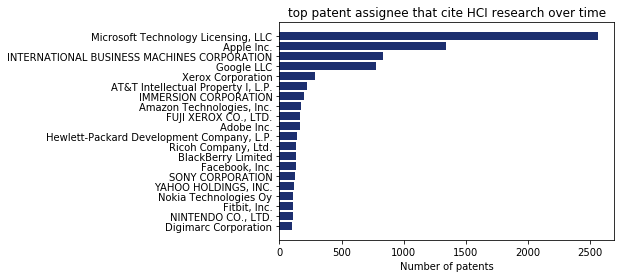

In [149]:
get_institute_patent_dist(df_patent, top_count = 20)
plt.title('top patent assignee that cite HCI research over time')

Text(0.5, 1.0, 'top patent assignee that cite HCI research over time, 2015-2020')

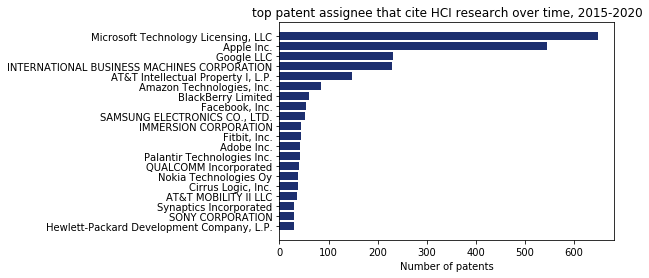

In [202]:
get_institute_patent_dist(df_patent[df_patent['year_range'] == pd.Interval(2015.0, 2020.0)])
plt.title('top patent assignee that cite HCI research over time, 2015-2020')

# top cited HCI papers by patents

In [96]:
df_citation_pair[df_citation_pair['title_x']=='WebSplitter: a unified XML framework for multi-device collaborative Web browsing']

,paperid_x,patent,mag_id,paperid_y,externalIds,url,title_x,abstract_x,venue,year,...,abstract_y,title_y,kind,num_claims,withdrawn,organization,aff_affiliations,aff_authorids,aff_paperid,patent_year
94645,1988816896,8090680,1988816896,dcc17f07834ca339e4d94db2e03b200fe5bcea02,"{'DBLP': 'conf/cscw/HanPN00', 'MAG': '19888168...",https://www.semanticscholar.org/paper/dcc17f07...,WebSplitter: a unified XML framework for multi...,WebSplitter symbolizes the union of pervasive ...,CSCW,2000.0,...,A system is provided for locating data in a di...,Method and system for locating data,B2,13,0,DUBLIN CITY UNIVERSITY,"['IBM Thomas J. Watson Research Center, 30 Saw...","['1935012324', '1972168839', '2128661168']",1988816896,2012
94648,1988816896,8752011,1988816896,dcc17f07834ca339e4d94db2e03b200fe5bcea02,"{'DBLP': 'conf/cscw/HanPN00', 'MAG': '19888168...",https://www.semanticscholar.org/paper/dcc17f07...,WebSplitter: a unified XML framework for multi...,WebSplitter symbolizes the union of pervasive ...,CSCW,2000.0,...,"Methods, systems and computer readable media f...","Methods, systems, and computer readable media ...",B2,36,0,THE UNIVERSITY OF NORTH CAROLINA AT CHAPEL HILL,"['IBM Thomas J. Watson Research Center, 30 Saw...","['1935012324', '1972168839', '2128661168']",1988816896,2014
94650,1988816896,8312131,1988816896,dcc17f07834ca339e4d94db2e03b200fe5bcea02,"{'DBLP': 'conf/cscw/HanPN00', 'MAG': '19888168...",https://www.semanticscholar.org/paper/dcc17f07...,WebSplitter: a unified XML framework for multi...,WebSplitter symbolizes the union of pervasive ...,CSCW,2000.0,...,A method for delivering requested media conten...,Method and apparatus for linking multimedia co...,B2,30,0,Motorola Mobility LLC,"['IBM Thomas J. Watson Research Center, 30 Saw...","['1935012324', '1972168839', '2128661168']",1988816896,2012
94651,1988816896,8468227,1988816896,dcc17f07834ca339e4d94db2e03b200fe5bcea02,"{'DBLP': 'conf/cscw/HanPN00', 'MAG': '19888168...",https://www.semanticscholar.org/paper/dcc17f07...,WebSplitter: a unified XML framework for multi...,WebSplitter symbolizes the union of pervasive ...,CSCW,2000.0,...,A method for delivering content to be rendered...,System and method for rendering content on mul...,B2,13,0,"Motorola Solutions, Inc.","['IBM Thomas J. Watson Research Center, 30 Saw...","['1935012324', '1972168839', '2128661168']",1988816896,2013
94655,1988816896,7168035,1988816896,dcc17f07834ca339e4d94db2e03b200fe5bcea02,"{'DBLP': 'conf/cscw/HanPN00', 'MAG': '19888168...",https://www.semanticscholar.org/paper/dcc17f07...,WebSplitter: a unified XML framework for multi...,WebSplitter symbolizes the union of pervasive ...,CSCW,2000.0,...,A designer uses a forms designer application t...,Building a view on markup language data throug...,B1,6,0,"Microsoft Technology Licensing, LLC","['IBM Thomas J. Watson Research Center, 30 Saw...","['1935012324', '1972168839', '2128661168']",1988816896,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95424,1988816896,9413746,1988816896,dcc17f07834ca339e4d94db2e03b200fe5bcea02,"{'DBLP': 'conf/cscw/HanPN00', 'MAG': '19888168...",https://www.semanticscholar.org/paper/dcc17f07...,WebSplitter: a unified XML framework for multi...,WebSplitter symbolizes the union of pervasive ...,CSCW,2000.0,...,Embodiments of the present invention address d...,Extension point application and configuration ...,B2,4,0,INTERNATIONAL BUSINESS MACHINES CORPORATION,"['IBM Thomas J. Watson Research Center, 30 Saw...","['1935012324', '1972168839', '2128661168']",1988816896,2016
95426,1988816896,9413817,1988816896,dcc17f07834ca339e4d94db2e03b200fe5bcea02,"{'DBLP': 'conf/cscw/HanPN00', 'MAG': '19888168...",https://www.semanticscholar.org/paper/dcc17f07...,WebSplitter: a unified XML framework for multi...,WebSplitter symbolizes the union of pervasive ...,CSCW,2000.0,...,"Methods, systems, and computer program product...",Executing dynamically assigned functions while...,B2,15,0,"Microsoft Technology L

In [26]:
df_citation_pair['year_range'] = pd.cut(df_citation_pair.patent_year, [1970,1980,1990,2000,2005, 2010, 2015, 2020], include_lowest=True)

In [27]:
set(df_citation_pair['year_range'])

{Interval(1980.0, 1990.0, closed='right'),
 Interval(1990.0, 2000.0, closed='right'),
 Interval(2000.0, 2005.0, closed='right'),
 Interval(2005.0, 2010.0, closed='right'),
 Interval(2010.0, 2015.0, closed='right'),
 Interval(2015.0, 2020.0, closed='right')}

In [179]:
# overall
top = 10
for venue in set(df_citation_pair['venue']):
    df_temp = df_citation_pair[df_citation_pair['venue']==venue]
    df_top = df_temp.groupby(['title_x']).aggregate('count').reset_index().sort_values(by='patent', ascending=False).reset_index().iloc[0:top][['title_x','paperid_x']]
    print ('*************')
    print ('top papers cited by patents ' + venue)
    for index, row in df_top.iterrows():
        print (row['title_x']+ ' ' +str(row['paperid_x'])+ ' ' + str(paper_year_dict[row['title_x']]))
        #print ('patent citation ' + str(row['paperid_x']))

*************
top papers cited by patents CHI
A multi-touch three dimensional touch-sensitive tablet 708 1985
PaperLink: a technique for hyperlinking from real paper to electronic content 200 1997
Bringing order to the Web: automatically categorizing search results 196 2000
A study in two-handed input 175 1986
Generalized fisheye views 175 1986
SmartSkin: an infrastructure for freehand manipulation on interactive surfaces 166 2002
AppLens and launchTile: two designs for one-handed thumb use on small devices 159 2005
Active click: tactile feedback for touch panels 156 2001
Finding others online: reputation systems for social online spaces 153 2002
Applying electric field sensing to human-computer interfaces 142 1995
*************
top papers cited by patents CSCW
GroupLens: an open architecture for collaborative filtering of netnews 185 1994
WebSplitter: a unified XML framework for multi-device collaborative Web browsing 166 2000
Blogging as social activity, or, would you let 900 million

In [180]:
# over time
top = 10
for venue in set(df_citation_pair['venue']):
    print ('|||||')
    for period in [pd.Interval(1980.0, 1990.0),pd.Interval(1990.0, 2000.0),pd.Interval(2000.0, 2005.0),pd.Interval(2005.0, 2010.0),pd.Interval(2010.0, 2015.0),pd.Interval(2015.0, 2020.0)]:
        df_temp = df_citation_pair[df_citation_pair['venue']==venue]
        df_temp = df_temp[df_temp['year_range']==period]
        df_top = df_temp.groupby(['title_x']).aggregate('count').reset_index().sort_values(by='patent', ascending=False).reset_index().iloc[0:top][['title_x','paperid_x']]
        print ('*************')
        print ('top papers cited by patents ' + str(period) + '' + venue)
        for index, row in df_top.iterrows():
            print (row['title_x']+ ' ' +str(row['paperid_x'])+ ' ' + str(paper_year_dict[row['title_x']]))
            

|||||
*************
top papers cited by patents (1980.0, 1990.0]CHI
Notecards in a nutshell 1 1986
*************
top papers cited by patents (1990.0, 2000.0]CHI
IMPACT: an interactive natural-motion-picture dedicated multimedia authoring system 31 1991
Generalized fisheye views 22 1986
Notecards in a nutshell 18 1986
The perspective wall: detail and context smoothly integrated 18 1991
A magnifier tool for video data 17 1992
A “pile” metaphor for supporting casual organization of information 15 1992
The information visualizer, an information workspace 11 1991
The pantograph: a large workspace haptic device for multimodal human computer interaction 11 1994
PICTIVE—an exploration in participatory design 11 1991
Iterative design of an interface for easy 3-D direct manipulation 10 1992
*************
top papers cited by patents (2000.0, 2005.0]CHI
Tangible bits: towards seamless interfaces between people, bits and atoms 30 1997
The pantograph: a large workspace haptic device for multimodal h

*************
top papers cited by patents (2005.0, 2010.0]UIST
The world through the computer: computer augmented interaction with real world environments 71 1995
HoloWall: designing a finger, hand, body, and object sensitive wall 45 1997
DiamondTouch: a multi-user touch technology 39 2001
Pick-and-drop: a direct manipulation technique for multiple computer environments 36 1997
Supporting cooperative and personal surfing with a desktop assistant 34 1997
Multi-finger and whole hand gestural interaction techniques for multi-user tabletop displays 34 2003
Moving markup: repositioning freeform annotations 32 2002
Design and technology for Collaborage: collaborative collages of information on physical walls 30 1999
Sensing techniques for mobile interaction 30 2000
Connectables: dynamic coupling of displays for the flexible creation of shared workspaces 30 2001
*************
top papers cited by patents (2010.0, 2015.0]UIST
Sensing techniques for mobile interaction 152 2000
HoloWall: designin

In [195]:
def plot_patent_citation(title):
    plt.hist(df_citation_pair[df_citation_pair['title_x']==title]['patent_year'])
    plt.ylabel('patent citation')
    plt.xlabel('year')
    plt.title(title + ', '+ str(paper_year_dict[title]))

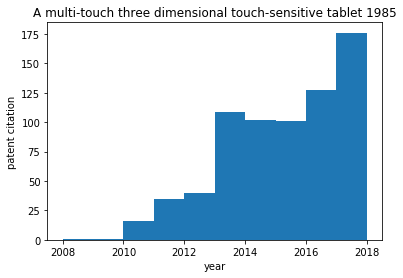

In [194]:
plot_patent_citation( 'A multi-touch three dimensional touch-sensitive tablet')

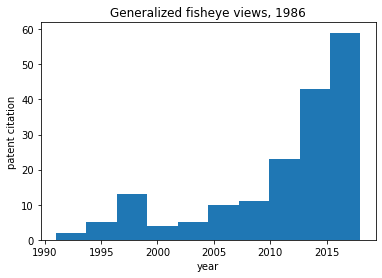

In [197]:
plot_patent_citation( 'Generalized fisheye views')

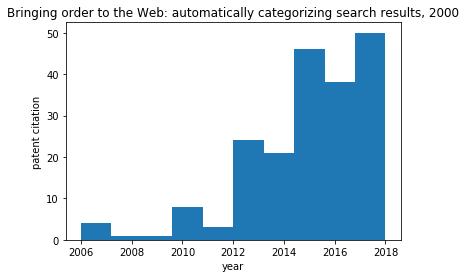

In [196]:
plot_patent_citation( 'Bringing order to the Web: automatically categorizing search results')

In [25]:
df_citation_pair

,paperid_x,patent,mag_id,paperid_y,externalIds,url,title_x,abstract_x,venue,year,...,abstract_y,title_y,kind,num_claims,withdrawn,organization,aff_affiliations,aff_authorids,aff_paperid,patent_year
0,2134161165,10001804,2134161165,7265fc23f282d1e64a6213a48770ba2534345985,"{'DBLP': 'conf/chi/RamsteinH94', 'MAG': '21341...",https://www.semanticscholar.org/paper/7265fc23...,The pantograph: a large workspace haptic devic...,A multi-modal user interface taking advantage ...,CHI,1994.0,...,A force-feedback device comprising a first mem...,Force-feedback device and method,B2,11,0,Force Dimension Sarl,"['McGill University, Research Centre for Intel...","['2000808029', '2308275767']",2134161165,2018
4,2134161165,6024576,2134161165,7265fc23f282d1e64a6213a48770ba2534345985,"{'DBLP': 'conf/chi/RamsteinH94', 'MAG': '21341...",https://www.semanticscholar.org/paper/7265fc23...,The pantograph: a large workspace haptic devic...,A multi-modal user interface taking advantage ...,CHI,1994.0,...,A mechanical interface for providing high ban...,"Hemispherical, high bandwidth mechanical inter...",A,54,0,IMMERSION CORPORATION,"['McGill University, Research Centre for Intel...","['2000808029', '2308275767']",2134161165,2000
9,2134161165,6028593,2134161165,7265fc23f282d1e64a6213a48770ba2534345985,"{'DBLP': 'conf/chi/RamsteinH94', 'MAG': '21341...",https://www.semanticscholar.org/paper/7265fc23...,The pantograph: a large workspace haptic devic...,A multi-modal user interface taking advantage ...,CHI,1994.0,...,A method and apparatus for providing force fe...,Method and apparatus for providing simulated p...,A,71,0,IMMERSION CORPORATION,"['McGill University, Research Centre for Intel...","['2000808029', '2308275767']",2134161165,2000
11,2134161165,6057828,2134161165,7265fc23f282d1e64a6213a48770ba2534345985,"{'DBLP': 'conf/chi/RamsteinH94', 'MAG': '21341...",https://www.semanticscholar.org/paper/7265fc23...,The pantograph: a large workspace haptic devic...,A multi-modal user interface taking advantage ...,CHI,1994.0,...,A method and apparatus for providing force se...,Method and apparatus for providing force sensa...,A,71,0,IMMERSION CORPORATION,"['McGill University, Research Centre for Intel...","['2000808029', '2308275767']",2134161165,2000
13,2134161165,6078308,2134161165,7265fc23f282d1e64a6213a48770ba2534345985,"{'DBLP': 'conf/chi/RamsteinH94', 'MAG': '21341...",https://www.semanticscholar.org/paper/7265fc23...,The pantograph: a large workspace haptic devic...,A multi-modal user interface taking advantage ...,CHI,1994.0,...,A method and apparatus for providing a click ...,Graphical click surfaces for force feedback ap...,A,43,0,IMMERSION CORPORATION,"['McGill University, Research Centre for Intel...","['2000808029', '2308275767']",2134161165,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116913,2064094676,9733881,2064094676,024208d85b0c92431ac8974dde69e5dcebe0d5b1,"{'MAG': '2064094676', 'DBLP': 'conf/uist/Lindl...",https://www.semanticscholar.org/paper/024208d8...,Tracs: transparency-control for see-through di...,"We present Tracs, a dual-sided see-through dis...",UIST,2014.0,...,An example facility described herein includes ...,Managing digital object viewability for a tran...,B2,20,0,INTERNATIONAL BUSINESS MACHINES CORPORATION,"['Keio University, Yokohama City, Kanagawa, Ja...","['2118079945', '2155099130', '2214760251', '22...",2064094676,2017
116914,1996931344,9740923,1996931344,fa0604c38c136ad61e60be551ee6d432bec335a2,"{'MAG': '1996931344', 'DBLP': 'conf/uist/Colac...",https://www.semanticscholar.org/paper/fa0604c3...,"Mime: compact, low power 3D gesture sensing fo...","We present Mime, a compact, low-power 3D senso...",UIST,2013.0,...,"An aspect provides a method, including: captur...",Image gestures for edge input,B2,18,0,Lenovo (Singapore) Pte. Ltd.,"['Massachusetts Institute of Technology, Cambr...","['1800868064', '1982348546', '2042299866', '20...",1996931344,2017
116916,1988798713,9740938,19887

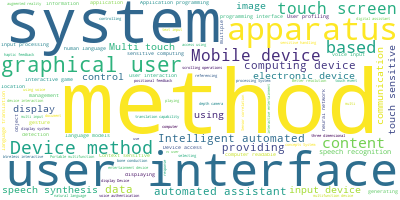

In [33]:
# abstract, patent not cited
df_citation_pair_temp = df_citation_pair[df_citation_pair['year_range']==pd.Interval(2015.0, 2020.0)]
df_temp = pd.DataFrame(df_citation_pair_temp['title_y']).dropna()
long_string = ','.join(list(df_temp['title_y'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

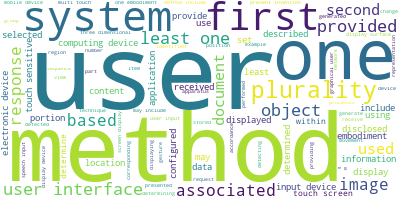

In [155]:
# abstract, patent not cited
df_temp = pd.DataFrame(df_citation_pair['abstract_y']).dropna()
long_string = ','.join(list(df_temp['abstract_y'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()